<a href="https://colab.research.google.com/github/TW-ZJLin/BackPropagationNeuralNetwork/blob/main/BackPropagation_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

## Dataset Visualization

### 2D Plotter

In [2]:
#-------------------------------------------------------------------------------
# Introduction: 3D plotter with matplotlib
# Input: x, y, label, title, quantity of color (array,array,array,string,int)
#-------------------------------------------------------------------------------
def Matplot2D(x, y, l, data_text='Training Dataset', color_quantity=10):
  fig,axes=plt.subplots(1,1,figsize=(10,10))

  axes.grid(linestyle='--', which='major', alpha=0.5)

  marksize = 10
  axes.scatter( x[ np.where( (0<=l) & (l<=1/color_quantity) ) ],
           y[ np.where( (0<=l) & (l<=1/color_quantity) ) ],
           color=[ 1, 0, 0 ], s=marksize )
  axes.scatter( x[ np.where( (1-1/color_quantity<=l) & (l<=1) ) ],
           y[ np.where( (1-1/color_quantity<=l) & (l<=1) ) ],
           color=[ 0, 0, 1 ], s=marksize )
  
  for i in range(1,color_quantity-1):
    axes.scatter( x[ np.where( (i/color_quantity<=l) & (l<=(i+1)/color_quantity) ) ],
           y[ np.where( (i/color_quantity<=l) & (l<=(i+1)/color_quantity) ) ],
           color=[ 1 - i/(color_quantity-1), 0, i/(color_quantity-1) ], s=marksize )

  plt.title(data_text, fontsize=32)
  plt.xlabel('x$_{1}$', fontsize=32)
  plt.ylabel('x$_{2}$', fontsize=32)
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=16)
  plt.legend(['[1, 0]','[0, 1]'], fontsize=16, loc='upper right')
  plt.tight_layout()
  plt.show()

### 3D Plotter

In [3]:
#-------------------------------------------------------------------------------
# Introduction: 3D plotter with matplotlib
# Input: x, y, z, title (array,array,array,string)
#-------------------------------------------------------------------------------
def Matplot3D(x,y,z,data_text='Training Dataset'):
  fig = plt.figure(figsize=(10,10))
  axes = fig.gca(projection='3d')

  axes.scatter(x, y, z, color="k", s=10)

  plt.title(data_text, fontsize=28)
  axes.legend( [data_text], fontsize=16 )
  axes.set_xlabel('x$_{1}$', fontsize=28)
  axes.set_ylabel('x$_{2}$', fontsize=28)
  axes.set_zlabel('labels', fontsize=28)

  plt.tight_layout()
  plt.show()

### Loss History Plotter

In [4]:
#-------------------------------------------------------------------------------
# Introduction: 2D plotter with matplotlib
# Input: loss_history (array)
#-------------------------------------------------------------------------------
def PlotLossHistory(loss_history):
  fig,axes=plt.subplots(1,1,figsize=(13,6))

  axes.plot( loss_history, color='r', linestyle="-", linewidth="2" )
  axes.grid(linestyle='--', which='major', alpha=1.0)

  plt.title("Loss History", fontsize=32)
  plt.xlabel('Update Times', fontsize=32)
  plt.ylabel('Error', fontsize=32)
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=16)
  plt.legend(['Loss History'], fontsize=16 )
  plt.tight_layout()
  plt.show()

### Weight History Plotter

In [5]:
#-------------------------------------------------------------------------------
# Introduction: 2D plotter with matplotlib
# Input: weight_history, epoch, idx_layer (list[array],int,int)
#-------------------------------------------------------------------------------
def PlotWeightHistory( weight_history, epoch, idx_layer=0 ):
  weight_size = weight_history[idx_layer][0].size
  weight_history_reshape = weight_history[idx_layer][0].reshape( weight_size, 1 )
  update_times = int(training_set.shape[0]/batch_size)*epoch
  for idx_update_times in range( 1, update_times ):
    if idx_update_times % epoch != 0: continue
    weight_history_reshape = np.hstack([ weight_history_reshape, weight_history[idx_layer][idx_update_times].reshape( weight_size, 1 ) ])

  fig,axes=plt.subplots(1,1,figsize=(13,6))

  for i in range(weight_history_reshape.shape[0]):
    axes.plot( weight_history_reshape[i,:], color='black', linestyle="-", linewidth="1" )
  axes.grid(linestyle='--', which='major', alpha=1.0)

  plt.title(f"Weight History of Layer {idx_layer}", fontsize=32)
  plt.xlabel('Update Times', fontsize=32)
  plt.ylabel('Weights', fontsize=32)
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=16)
  plt.tight_layout()
  plt.show()

## Dataset Construction

Building a binary classification problem with 2D features (x, y).<br>
Where -10 < x, y < 10, and the size of dataset = 20000.<br>
If x+y>0, it is classified into the first category and labeled as [1, 0].<br>
Otherwise, classify the others into the second category and label them as [0, 1].<br>

In [6]:
def ModelFunction(x,y):
  if 0 < (x+y):
    return [1,0]
  else:
    return [0,1]

dataset_size = 20000
training_set = np.hstack([ np.random.rand(dataset_size,2)*20-10, np.zeros([dataset_size,2]) ])
training_label = np.zeros([dataset_size,1])
for i in range(dataset_size):
  temp_output = ModelFunction( training_set[i,0], training_set[i,1] )
  training_set[i,2:4] = temp_output
  training_label[i] = temp_output[0]

In [7]:
training_set[:10]

array([[-7.64960245,  6.37403025,  0.        ,  1.        ],
       [ 6.98028511,  9.56267205,  1.        ,  0.        ],
       [-2.57145435,  2.58554299,  1.        ,  0.        ],
       [-5.6018424 , -4.66933234,  0.        ,  1.        ],
       [ 8.07674899, -9.95961001,  0.        ,  1.        ],
       [ 7.65370455, -0.8878816 ,  1.        ,  0.        ],
       [ 0.99768903, -0.07842938,  1.        ,  0.        ],
       [ 5.55932649,  1.87690377,  1.        ,  0.        ],
       [-6.28911259, -3.25936943,  0.        ,  1.        ],
       [-7.9199712 , -5.15011083,  0.        ,  1.        ]])

## Dataset Visualization

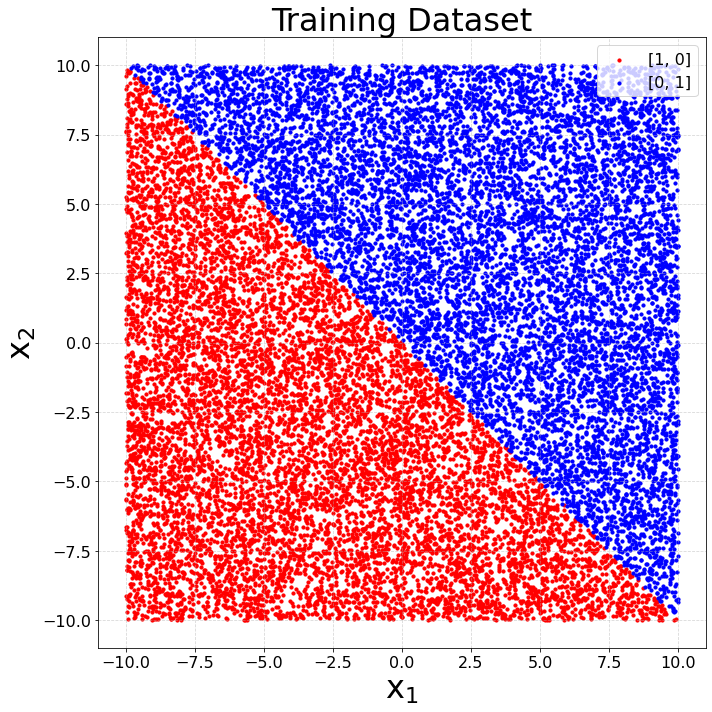

In [8]:
Matplot2D(training_set[:,0],training_set[:,1],training_label[:,0])

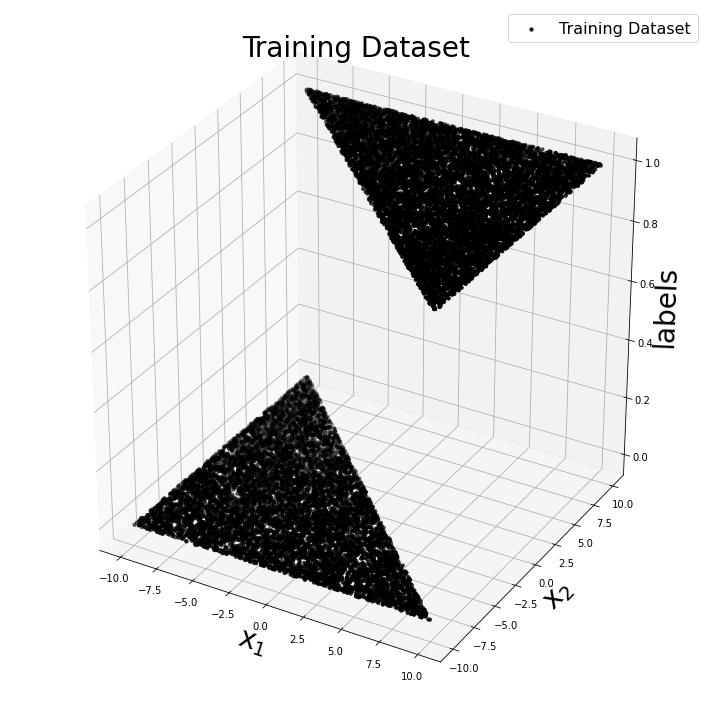

In [9]:
Matplot3D(training_set[:,0],training_set[:,1],training_label[:,0])

## Class : Fully Connected Layer

In [10]:
class FullyConnectedLayer():
  def __init__(self,input_size,neuron_size,is_output_layer=False):
    # Initialization
    #-------------------------------------------------------------------------------
    self.input_size = input_size
    self.neuron_size = neuron_size
    self.is_output_layer = is_output_layer
    self.learning_rate = 0.1

    self.weights = np.random.normal(loc=0.0, scale=1.0, size=(input_size, neuron_size))
    self.bias = np.ones([1,neuron_size])

    self.dzdw = np.zeros([input_size, neuron_size])
    self.dzdb = np.ones([1,neuron_size])

    self.dJdw = np.zeros([input_size, neuron_size])
    self.dJdb = np.zeros([1,neuron_size])

    # Adam Optimizer
    #-------------------------------------------------------------------------------
    self.weights_moment_1 = np.zeros([input_size, neuron_size])
    self.weights_moment_2 = np.zeros([input_size, neuron_size])
    self.bias_moment_1 = np.zeros([1, neuron_size])
    self.bias_moment_2 = np.zeros([1, neuron_size])
    self.adam_beta1 = 0.9
    self.adam_beta2 = 0.999
    self.adam_epsilon = 10**(-8)
    self.weights_update = np.zeros([input_size, neuron_size])
    self.bias_update = np.zeros([1, neuron_size])
    self.time_step = 0

  # Get Weight
  #-------------------------------------------------------------------------------
  def GetWeight(self):
    return self.weights

  # Reset Derivative
  #-------------------------------------------------------------------------------
  def DerivativeReset(self):
    self.dzdw = np.zeros([self.input_size, self.neuron_size])
    self.dzdb = np.ones([1,self.neuron_size])

    self.dJdw = np.zeros([self.input_size, self.neuron_size])
    self.dJdb = np.zeros([1,self.neuron_size])

  # Update Weight Original
  #-------------------------------------------------------------------------------
  def UpdateWeight(self,batch_size):
    self.weights = self.weights - self.learning_rate*self.dJdw / batch_size
    self.bais = self.bias - self.learning_rate*self.dJdb / batch_size

  # Update Weight with Adam Optimizer
  #-------------------------------------------------------------------------------
  def UpdateWeightAdam(self,batch_size):
    self.time_step += 1
    dJdw = self.dJdw/batch_size
    self.weights_moment_1 = self.adam_beta1*self.weights_moment_1 + (1-self.adam_beta1)*dJdw
    self.weights_moment_2 = self.adam_beta2*self.weights_moment_2 + (1-self.adam_beta2)*dJdw*dJdw
    weights_moment_1_hat = self.weights_moment_1 / ( 1 - self.adam_beta1**self.time_step )
    weights_moment_2_hat = self.weights_moment_2 / ( 1 - self.adam_beta2**self.time_step )
    weights_update = weights_moment_1_hat / ( np.sqrt(weights_moment_2_hat) + self.adam_epsilon )

    dJdb = self.dJdb/batch_size
    self.bias_moment_1 = self.adam_beta1*self.bias_moment_1 + (1-self.adam_beta1)*dJdb
    self.bias_moment_2 = self.adam_beta2*self.bias_moment_2 + (1-self.adam_beta2)*dJdb*dJdb
    bias_moment_1_hat = self.bias_moment_1 / ( 1 - self.adam_beta1**self.time_step )
    bias_moment_2_hat = self.bias_moment_2 / ( 1 - self.adam_beta2**self.time_step )
    bias_update = bias_moment_1_hat / ( np.sqrt(bias_moment_2_hat) + self.adam_epsilon )

    self.weights = self.weights - self.learning_rate * weights_update
    self.bais = self.bias - self.learning_rate * bias_update

  # Learning Rate Decay by a factor of 0.9
  #-------------------------------------------------------------------------------
  def LearningRateDecay(self):
    self.learning_rate = self.learning_rate*0.9

  # Activation Function with Sigmoid
  #-------------------------------------------------------------------------------
  def SigmoidFunction(self,z):
    return 1 / ( 1 + np.exp(-z) )

  # Activation Function with ReLU
  #-------------------------------------------------------------------------------
  def ReLUFunction(self,z):
    return np.maximum( z, 0. )

  # Activation Function with Softmax
  #-------------------------------------------------------------------------------
  def SoftmaxFunction(self,z):
    exp_z = np.exp(z)
    return exp_z/np.sum( exp_z, axis=1, keepdims=True )

  # Jacobian of Softmax
  #-------------------------------------------------------------------------------
  def SoftmaxJacobian(self,output):
    Softmax_Jacobian = np.array([ [ output[0,i]*(1-output[0,i]) if i == j else -output[0,i]*output[0,j] \
                    for j in range(output.size) ] \
                    for i in range(output.size) ])
    return Softmax_Jacobian

  # Transform of Layer
  #-------------------------------------------------------------------------------
  def LayerTransform(self,inputs):
    self.inputs = inputs
    if self.is_output_layer:
      self.outputs = self.SoftmaxFunction( np.dot( inputs, self.weights ) + self.bias )
    else:
      self.outputs = self.SigmoidFunction( np.dot( inputs, self.weights ) + self.bias )
    return self.outputs

  # Back-Propagation : Chain Rule
  #-------------------------------------------------------------------------------
  # dJdw = dJda*dadz*dzdw
  # dJdb = dJda*dadz*dzdb
  def BackPropagation(self,dJda,idx_data):
    if self.is_output_layer:
      input = np.transpose( self.inputs[idx_data:idx_data+1,:] )
      output = self.outputs[idx_data:idx_data+1,:]

      # dJdz = np.dot( dJda, SoftmaxJacobian(output) ) # backup
      # Because the derivatives of Softmax and CrossEntropy are combined, there is no need to calculate the Jacobian of Softmax
      dJdz = dJda
      self.dJdw += np.dot( input, dJdz )
      self.dJdb += dJdz
      return np.dot( dJda, np.transpose( self.weights ) )
    else:
      input = np.transpose( self.inputs[idx_data:idx_data+1,:] )
      output = self.outputs[idx_data:idx_data+1,:]

      dJdz = dJda*output*(1-output) # Sigmoid Derivative
      self.dJdw += np.dot( input, dJdz )
      self.dJdb += dJdz
      return np.dot( dJdz, np.transpose( self.weights ) )

## Class : Neural Network

In [11]:
class NeuralNetwork():
  def __init__(self,input_size,output_size,batch_size=20,epoch=3):
    # Initialization
    #-------------------------------------------------------------------------------
    self.input_size = input_size
    self.output_size = output_size
    self.layer_list = []
    self.batch_size = batch_size
    self.epoch = epoch
    self.dataset_size = 0
    self.input_normalization = np.vstack([ np.zeros([1,input_size]), np.ones([1,input_size]) ]) # mean; standard deviation

  # Add Layer
  #-------------------------------------------------------------------------------
  def AddLayer(self,layer):
    if not self.layer_list: # for first layer
      if self.input_size == layer.input_size:
        self.layer_list += [ layer ]
      else:
        print("Input sizes are not equal!")
    else: # for other layer
      if self.layer_list[-1].neuron_size == layer.input_size:
        self.layer_list += [ layer ]
      else:
        print("Disallowed layer size!")
  
  # Transform of Neural Network through every layer
  #-------------------------------------------------------------------------------
  def Transform(self,inputs):
    # Input Normalization (z-score)
    #-------------------------------------------------------------------------------
    outputs = np.array( (inputs-self.input_normalization[0,:])/self.input_normalization[1,:] )

    # Input Normalization (Feature Scaling)
    #-------------------------------------------------------------------------------
    # outputs = np.array( inputs )/10.

    for i in range(len(self.layer_list)):
      outputs = self.layer_list[i].LayerTransform(outputs)
    return outputs

  # Input Training Data
  #-------------------------------------------------------------------------------
  def InputTrainingData(self,training_set):
    if training_set.shape[1] == self.input_size + self.output_size:
      self.dataset_size = training_set.shape[0]

      self.features = training_set[ :, :self.input_size ]
      self.labels = training_set[ :, -self.output_size: ]
      
      mean = np.sum( self.features, axis=0, keepdims=True )/self.dataset_size
      SD = np.sqrt( np.sum( (self.features - mean)**2, axis=0, keepdims=True )/self.dataset_size )
      self.input_normalization = np.vstack([ mean, SD ])
    else:
      print("Dataset size do not match with I/O size!")

  # Loss Function by Mean Squared Error (MSE)
  #-------------------------------------------------------------------------------
  def LossFunctionMSE(self,output,label):
    return np.sum( ( output - label )**2 / 2 )/self.output_size

  # Derivative of Loss Function by Mean Squared Error (MSE)
  #-------------------------------------------------------------------------------
  def DiffLossMSE(self,output,label):
    return ( output - label )/self.output_size

  # Loss Function by Cross Entropy
  #-------------------------------------------------------------------------------
  def LossFunctionCrossEntropy(self,output,label):
    return np.sum( -np.log10(output)*label )

  # Derivative of Loss Function by Cross Entropy
  #-------------------------------------------------------------------------------
  def DiffLossCrossEntropyOriginal(self,output,label):
    return -label / output

  # Derivatives when using both Cross Entropy and Softmax
  #-------------------------------------------------------------------------------
  def DiffLossCrossEntropy(self,output,label):
    return output - label

  # Training
  #-------------------------------------------------------------------------------
  def Train(self):
    # Calculate the total number of batches
    #-------------------------------------------------------------------------------
    batch_times = int(np.ceil( self.dataset_size / self.batch_size ))

    # Records loss and weights
    #-------------------------------------------------------------------------------
    total_loss = []
    total_weight = [ [] for _ in range(len(self.layer_list)) ]

    # epoch iteration
    #-------------------------------------------------------------------------------
    for idx_epoch in range(self.epoch):
      # batch iteration
      #-------------------------------------------------------------------------------
      for idx_batch in range(batch_times):
        # Calculate the number of data in this batch
        #-------------------------------------------------------------------------------
        if self.dataset_size % self.batch_size == 0 or idx_batch < batch_times -1 :
          real_batch_size = self.batch_size
        else:
          real_batch_size = self.dataset_size % self.batch_size

        # Calculate the index at the beginning and end in this batch
        #-------------------------------------------------------------------------------
        idx_initial = self.batch_size*idx_batch
        idx_end = idx_initial + real_batch_size

        # Model Outputs
        #-------------------------------------------------------------------------------
        outputs = self.Transform(self.features[ idx_initial : idx_end ])
        
        # Using MSE Loss Function
        #-------------------------------------------------------------------------------
        # loss = self.LossFunctionMSE( outputs, self.labels[ idx_initial : idx_end ] ) / real_batch_size
        # diff_loss = self.DiffLossMSE( outputs, self.labels[ idx_initial : idx_end ] ) / real_batch_size

        # Using Cross Entropy Loss Function
        #-------------------------------------------------------------------------------
        loss = self.LossFunctionCrossEntropy( outputs, self.labels[ idx_initial : idx_end ] ) / real_batch_size
        diff_loss = self.DiffLossCrossEntropy( outputs, self.labels[ idx_initial : idx_end ] ) / real_batch_size

        # Derivative Reset for every layer
        #-------------------------------------------------------------------------------
        for idx_layer in range(len(self.layer_list)):
          self.layer_list[idx_layer].DerivativeReset()

        # Back-Propagation : Calculate Derivative
        #-------------------------------------------------------------------------------
        for idx_data in range( idx_end - idx_initial ):
          dJda = diff_loss[idx_data:idx_data+1,:]
          for idx_layer in range(len(self.layer_list)-1,-1,-1):
            dJda = self.layer_list[idx_layer].BackPropagation(dJda,idx_data)
        
        # Update Weight
        #-------------------------------------------------------------------------------
        for idx_layer in range(len(self.layer_list)-1,-1,-1):
          self.layer_list[idx_layer].UpdateWeightAdam(real_batch_size)

        # Records loss and weights history
        #-------------------------------------------------------------------------------
        total_loss += [ loss ]
        for idx_layer in range(len(self.layer_list)):
          total_weight[idx_layer] += [ self.layer_list[idx_layer].GetWeight() ]

      # Learning Rate Decay after each epoch
      #-------------------------------------------------------------------------------
      # for idx_layer in range(len(self.layer_list)):
      #   self.layer_list[idx_layer].LearningRateDecay()
    
    # return loss and weights history
    #-------------------------------------------------------------------------------
    return total_loss, total_weight

## Implement

In [12]:
# Set batch size and epoch
#-------------------------------------------------------------------------------
batch_size = 500
epoch = 10

# Create model, set dimension of feature(input) and label(output)
#-------------------------------------------------------------------------------
MyModel = NeuralNetwork( input_size=2, output_size=2, batch_size=batch_size, epoch=epoch )

# Create layer, set dimension of layer input and number of neuron 
#-------------------------------------------------------------------------------
layer1 = FullyConnectedLayer( input_size=2, neuron_size=16 )
layer2 = FullyConnectedLayer( input_size=16, neuron_size=32 )
layer3 = FullyConnectedLayer( input_size=32, neuron_size=2, is_output_layer=True )

# Add layers into the model
#-------------------------------------------------------------------------------
MyModel.AddLayer(layer1)
MyModel.AddLayer(layer2)
MyModel.AddLayer(layer3)

# Input training data to the model
#-------------------------------------------------------------------------------
MyModel.InputTrainingData(training_set)

# Start training, show training time and accuracy
#-------------------------------------------------------------------------------
time_start = time.time()
loss_history, weight_history = MyModel.Train()
print(f"Training Time: {round(time.time()-time_start,5)}s")
print(f"Accuracy: {round((1-loss_history[-1])*100,5)}")

Training Time: 17.66789s
Accuracy: 99.63903


## Loss History

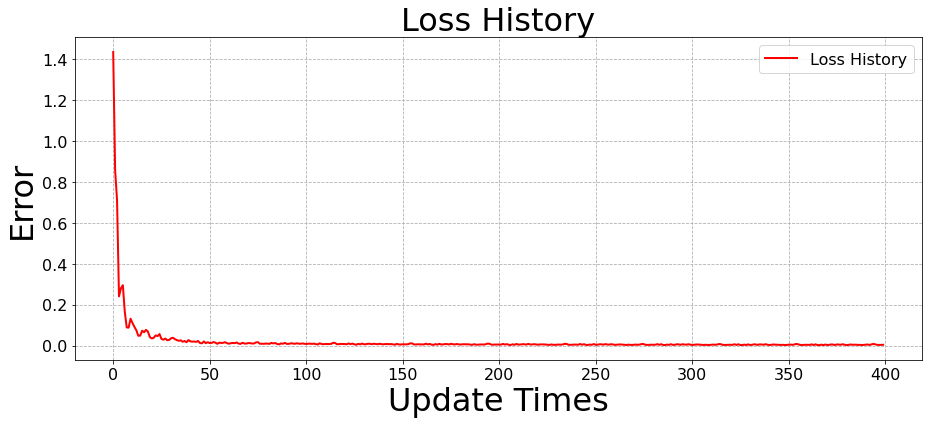

In [13]:
PlotLossHistory( loss_history )

## Weight History

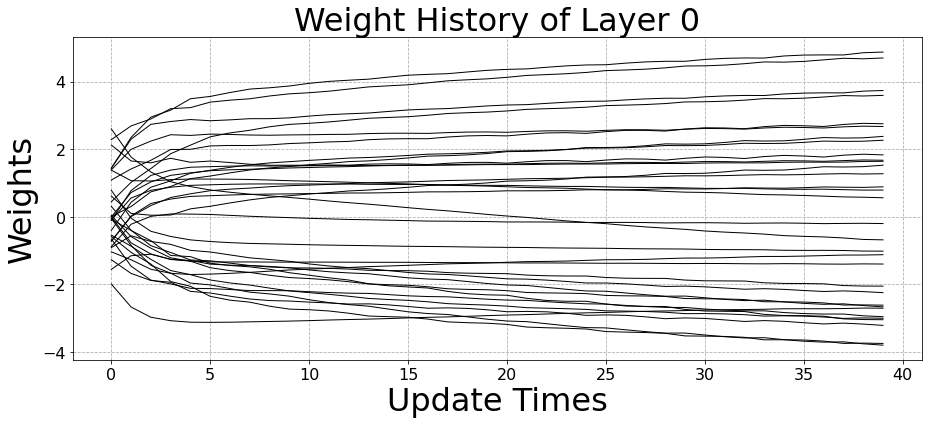

In [14]:
PlotWeightHistory( weight_history, epoch = epoch, idx_layer = 0 )

## Testing set Construction

In [21]:
testing_set = []
bounded = 10
step = bounded/100

idx_x = -bounded
while( idx_x <= bounded ):
  idx_y = -bounded
  while( idx_y <= bounded ):
    testing_set += [[ idx_x, idx_y,
              MyModel.Transform([idx_x, idx_y])[0,0] ]]
    idx_y += step
  idx_x += step

testing_set = np.array(testing_set)

## Testing set Visualization

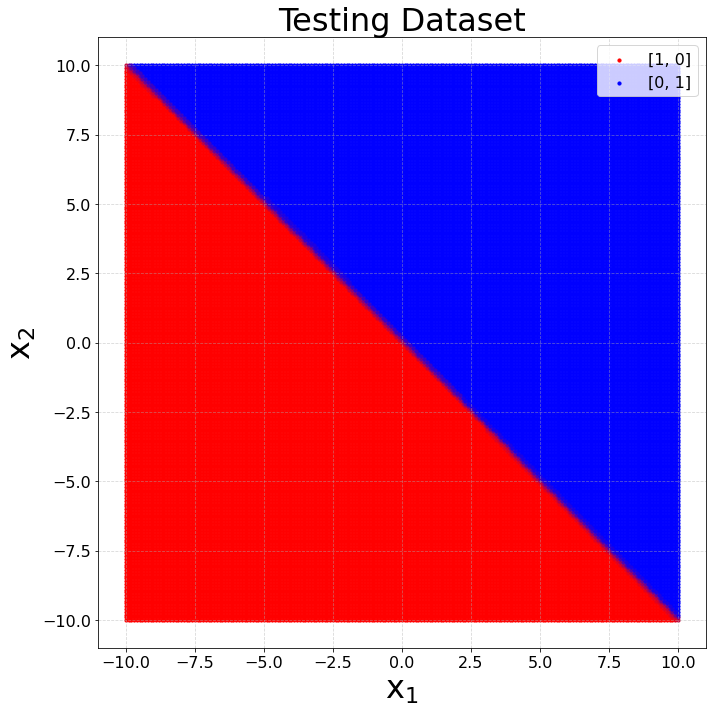

In [22]:
Matplot2D(testing_set[:,0],testing_set[:,1],testing_set[:,2],'Testing Dataset')

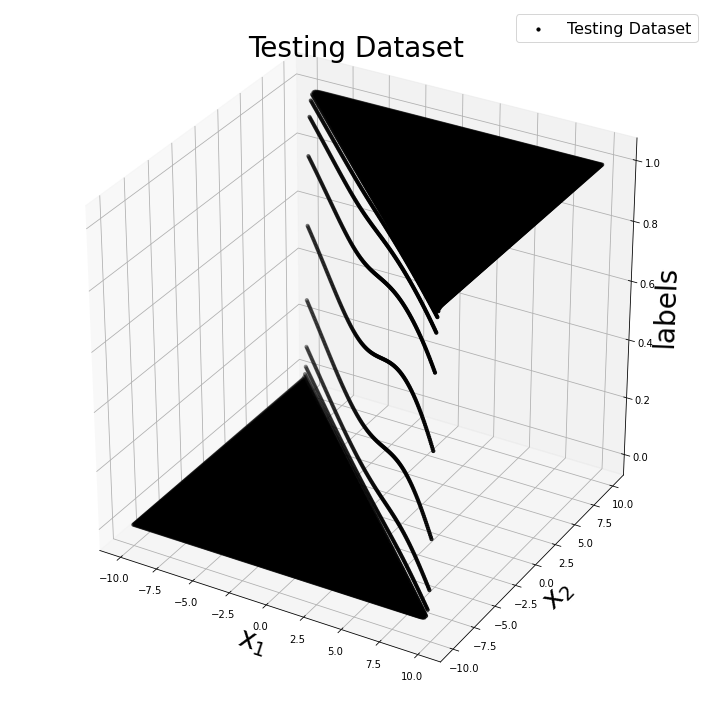

In [23]:
Matplot3D(testing_set[:,0],testing_set[:,1],testing_set[:,2],'Testing Dataset')